<a href="https://colab.research.google.com/github/YaMUdreC/Ml-and-nn-colab/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_1__%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F_%D0%91%D1%83%D0%B4%D0%BA%D0%BE%D0%B2_%D0%AF%D1%80%D0%BE%D1%81%D0%BB%D0%B0%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическое задание № 1. Классификация


**Работу выполнил (а):**

Будков Ярослав Антонович, 367934

# Распознавание активности человека на основе данных с мобильных сенсоров

Необходимо по данным с мобильных сенсоров при помощи прикладных алгоритмов машинного обучения предсказать активность человека по шести классам движений:
* Движется по прямой
* Движется вверх (например, движение по лестнице вверх)
* Движется вниз (например, движение по лестнице вниз)
* Сидит
* Стоит
* Лежит

## Сведения о наборе данных
Набор данных содержит записи датчиков со сматфонов (акселерометр и гироскоп с частотой дискретизации 50 Гц) от 30 участников, выполняющих следующие действия: ходьба, ходьба по лестнице, ходьба по лестнице, сидение, стояние и лежание. Данные были предварительно обработаны при помощи фильтров шума. Набор данных представлен Хорхе Л. Рейес-Ортисом.

Признаки были извлечены из 3-х осевых необработанных сигналов акселерометра и гироскопа tAcc-XYZ и tGyro-XYZ. Эти сигналы были сняты с постоянной частотой 50 Гц. Затем были отфильтрованны с помощью медианного фильтра и низкочастотного фильтра Баттерворта 3-го порядка с частотой 20 Гц для удаления шумов. Аналогичным образом сигнал ускорения был разделен на сигналы ускорения тела и гравитации (`tBodyAcc-XYZ` и `tGravityAcc-XYZ`) с помощью другого низкочастотного фильтра Баттерворта с угловой частотой 0,3 Гц. Линейное ускорение тела и угловая скорость были использованы для получения сигналов "рывка" — (`tBodyAccJerk-XYZ` и `tBodyGyroJerk-XYZ`). Также величина этих трехмерных сигналов была расчитана с использованием евклидовой нормы — (`tBodyAccMag`, `tGravityAccMag`, `tBodyAccJerkMag`, `tBodyGyroMag`, `tBodyGyroJerkMag`).

Наконец, к некоторым из этих сигналов было применено быстрое преобразование Фурье (БПФ), в результате чего получились `fBodyAcc-XYZ`, `fBodyAccJerk-XYZ`, `fBodyGyro-XYZ`, `fBodyAccJerkMag`, `fBodyGyroMag`, `fBodyGyroJerkMag`. (Обратите внимание на "f" для обозначения сигналов в частотной области).

Набор переменных, которые были оценены по этим сигналам, следующий:
* mean(): Среднее значение
* std(): Стандартное отклонение
* mad(): Среднее абсолютное отклонение
* max(): Наибольшее значение в массиве
* min(): Наименьшее значение в массиве
* sma(): Область величины сигнала
* energy(): Мера энергии. Сумма квадратов, деленная на количество значений.
* iqr(): Интерквартильный размах
* entropy(): Энтропия сигнала
* arCoeff(): Коэффициенты авторегрессии с порядком Burg, равным 4
* correlation(): коэффициент корреляции между двумя сигналами
* maxInds(): индекс частотной составляющей с наибольшей величиной
* meanFreq(): средневзвешенное значение частотных компонент для получения средней частоты
* skewness(): перекос сигнала в частотной области
* kurtosis(): эксцесс сигнала в частотной области
* bandsEnergy(): Энергия частотного интервала в пределах 64 бинов БПФ каждого окна.
* angle(): Угол между векторами.
## Импорт библиотек
Первым делом импортируем необходимые библиотеки для работы с данными:

In [ ]:
import os
import numpy as np
import pandas as pd

## Считываем набор данных

В прикладных задачах машинного обучения очень важен процесс извлечения признаков (feature extraction), в ходе которого данные интерпретируются в информативные признаки. Также этот процесс может называться проектирование признаков (feature engineering), это весьма трудоемкая и творческая задача. В рамках работы мы опустим эту часть и воспользуемся предобработанными данными.

In [ ]:
def read_data(path, filename):
    return pd.read_csv(os.path.join(path, filename))

df = read_data('/content/data', 'train.csv')
df.head()


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING




```
# This is formatted as code
```

Теперь, загрузим полный набор данных и сохранить его под следующими четырьмя переменными:

* `train_X`: признаки, используемые для обучения модели
* `train_y`: метки, используемые для обучения модели
* `test_X`: признаки, используемые для проверки модели
* `test_y`: метки, используемые для проверки модели

In [ ]:
def load_dataset(label_dict):
    train_X = read_data('/content/data', 'train.csv').values[:,:-2]
    train_y = read_data('/content/data', 'train.csv')['Activity']
    train_y = train_y.map(label_dict).values
    test_X = read_data('/content/data', 'test.csv').values[:,:-2]
    test_y = read_data('/content/data', 'test.csv')
    test_y = test_y['Activity'].map(label_dict).values
    return(train_X, train_y, test_X, test_y)
label_dict = {'WALKING':0, 'WALKING_UPSTAIRS':1, 'WALKING_DOWNSTAIRS':2, 'SITTING':3, 'STANDING':4, 'LAYING':5}
train_X, train_y, test_X, test_y = load_dataset(label_dict)

## Выбор модели

Импортируйте выбранную вами модель из библиотеки `sklearn` и инициализируйте её в объект `model`:

Также необходимо выбрать **несколько** моделей ML для сравнения полученных результатов.

In [ ]:
# from sklearn.модель import название
# ниже замените None на инициализацию вашей модели
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm



In [ ]:
from sklearn.metrics import accuracy_score

num_neighbors = np.arange(
    1, 31
)  # array of the numbers of nearest neigbors from 1 to 30
train_quality = np.zeros(num_neighbors.shape[0])  # quality on train data
test_quality = np.zeros(num_neighbors.shape[0])  # quality on test data

for i in range(num_neighbors.shape[0]):
    modelKNN = KNeighborsClassifier(n_neighbors=num_neighbors[i])
    modelKNN.fit(train_X, train_y)

    # accuracy on train data
    train_quality[i] = accuracy_score(y_pred=modelKNN.predict(train_X), y_true=train_y)

    # accuracy on test data
    test_quality[i] = accuracy_score(y_pred=modelKNN.predict(test_X), y_true=test_y)

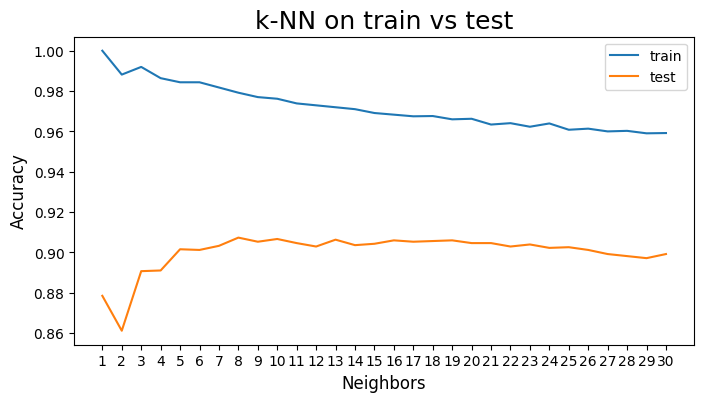

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.title("k-NN on train vs test", size=18)
plt.plot(num_neighbors, train_quality, label="train")
plt.plot(num_neighbors, test_quality, label="test")
plt.legend()
plt.xticks(num_neighbors)
plt.xlabel("Neighbors", size=12)
plt.ylabel("Accuracy", size=12)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

degree = np.arange(
    2, 11
)  # array of the numbers of nearest neigbors from 1 to 30
train_quality = np.zeros(degree.shape[0])  # quality on train data
test_quality = np.zeros(degree.shape[0])  # quality on test data

for i in range(degree.shape[0]):

    modelCLFP = svm.SVC(kernel="poly", degree=degree[i])
    modelCLFP.fit(train_X, train_y)

    # accuracy on train data
    train_quality[i] = accuracy_score(y_pred=modelCLFP.predict(train_X), y_true=train_y)

    # accuracy on test data
    test_quality[i] = accuracy_score(y_pred=modelCLFP.predict(test_X), y_true=test_y)

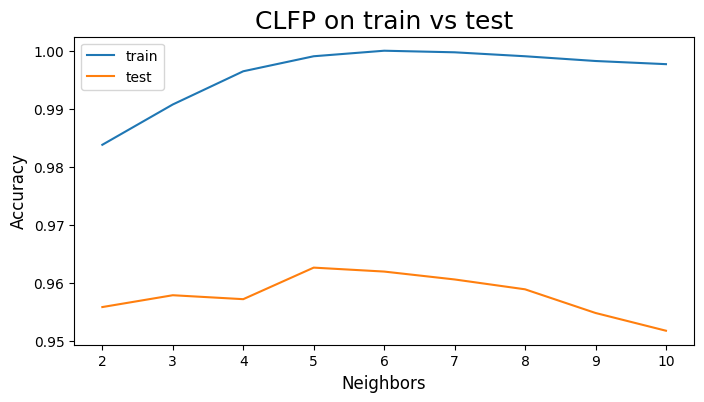

In [ ]:
plt.figure(figsize=(8, 4))
plt.title("CLFP on train vs test", size=18)
plt.plot(degree, train_quality, label="train")
plt.plot(degree, test_quality, label="test")
plt.legend()
plt.xticks(degree)
plt.xlabel("Neighbors", size=12)
plt.ylabel("Accuracy", size=12)
plt.show()

Опишите вашу мотивацию по выбору модели. Какие гиперпараметры есть у выбранной вами модели? За что они отвечают? На что влияют?

## Обучение модели

Обучите модель, используя признаки из обучающего набора (`train_X`) и метки в качестве базовой истины (`train_y`).

In [ ]:
modelGNB = modelKNN = KNeighborsClassifier(n_neighbors=29)
modelGNB.fit(train_X, train_y)

modelGNB = GaussianNB()
modelGNB.fit(train_X, train_y)

modelRFC = RandomForestClassifier(random_state=42)
modelRFC.fit(train_X, train_y)

modelCLF = svm.SVC(kernel="linear")
modelCLF.fit(train_X, train_y)

modelCLFP = svm.SVC(kernel="poly", degree=5)
modelCLFP.fit(train_X, train_y)

SVC(degree=5, kernel='poly')

## Оценка модели
Используйте обученную модель для прогнозирования активности движения, используя признаки из тестового набора (`test_X`). Прогнозы сохраните в списке `yhat`.

In [ ]:
yhatGNB = modelGNB.predict(test_X)
yhatKNN = modelKNN.predict(test_X)
yhatRFC = modelRFC.predict(test_X)
yhatCLF = modelCLF.predict(test_X)
yhatCLFP = modelCLFP.predict(test_X)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Walking', 'Walking Upstairs', 'Walking Downstairs', 'Sitting', 'Standing', 'Laying']

print("yhatGNB")
print(classification_report(test_y, yhatGNB, target_names=target_names))

print("yhatKNN")
print(classification_report(test_y, yhatKNN, target_names=target_names))

print("yhatRFC")
print(classification_report(test_y, yhatRFC, target_names=target_names))

print("yhatCLF")
print(classification_report(test_y, yhatCLF, target_names=target_names))

print("yhatCLFP")
print(classification_report(test_y, yhatCLFP, target_names=target_names))

yhatGNB
                    precision    recall  f1-score   support

           Walking       0.82      0.84      0.83       496
  Walking Upstairs       0.76      0.96      0.84       471
Walking Downstairs       0.83      0.61      0.70       420
           Sitting       0.58      0.75      0.65       491
          Standing       0.80      0.86      0.83       532
            Laying       0.96      0.60      0.74       537

          accuracy                           0.77      2947
         macro avg       0.79      0.77      0.77      2947
      weighted avg       0.79      0.77      0.77      2947

yhatKNN
                    precision    recall  f1-score   support

           Walking       0.84      0.99      0.90       496
  Walking Upstairs       0.89      0.91      0.90       471
Walking Downstairs       0.97      0.76      0.85       420
           Sitting       0.92      0.76      0.83       491
          Standing       0.81      0.94      0.87       532
            Laying  

In [ ]:
#Результаты сравнения






## Задание


Выведите отчет о классификации, сравнив предсказания (`yhat`) с базовой истиной (`test_y`).

В чем разница между показателями `precision` и `recall`? Что такое показатель `F1`?

Используйте вариации нескольких моделей с разными гиперпараметрами. Сравните полученный результат (визуализируйте полученный результат).

Что такое гиперпараметры модели машинного обучения (МО)?

Опишите влияние гиперпараметров в выбранных вами моделях МО.

**Выведите отчет о классификации, сравнив предсказания (yhat) с базовой истиной (test_y).**

Наилучшем образом для данного случая себя показала модель SVC, а хуже всего GNB.


---


**В чем разница между показателями precision и recall? Что такое показатель F1?**


Точность (Precision)
Процент положительных меток, которые правильно определены. (Верное из выбранного)

Полнота (Recall)
Процент положительных примеров, которые были правильно определены. (Выбранное из верного)

F-мера (в общем случае Fβ ) — среднее гармоническое precision и recall. Обычно используется для оценки гиперпараметров по одному показателю.

Для F1 2* (precision⋅recall) / (precision+recall)



---

**Используйте вариации нескольких моделей с разными гиперпараметрами. Сравните полученный результат (визуализируйте полученный результат).**

В пункте выбора модели я провожу сравнение разных гиперпараметров для двух моделей и вывожу их графики.



---

**Что такое гиперпараметры модели машинного обучения (МО)?**

Настраиваемые параметры, с помощью которых мы можем управлять процессом обучения.



---

**Опишите влияние гиперпараметров в выбранных вами моделях МО.**

Для случая KNN выбор гиперпараметра количество соседей влияет на количество соседей с которыми идет сравнение. Для случая SVC с атрибутом kernel poly, мы задаем гиперпараметром degree степень полинома.
